# Project: Classification - Loan Eligibility Prediction

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context:
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses.

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan.

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands)
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset - Add libraries as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [ ]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


**Printing the Info - DataTypes, Non-Null**

In [ ]:
#Pulling the information about the data - Data Type, Null Count etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


**Observations**
- There are 614 observations and 12 columns.
- There are several missing values in the data and the data needs to be cleaned in order to use it.

**Unique values**

In [ ]:
#Identifying the number of unique values available in the columns
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Observations**
- Loan ID is an unique identifier and will not be useful to analyse -> Can be dropped.
- Gender, Dependents, Married, Education, Self Employed, Credit History, Property Area, Loan Status, Loan Amount term seems to be categorical data.
- Application Income, Coapplicant Income, Loan Amount are the numerical data

Dropping the columns and creating arrays for categorical and Numerical Data


In [ ]:
#Separating data columns into categorical and Numerical columns
#Dropping Loan ID column as it doesn't provide any value to our evaluation. It is just an ID.
data=data.drop('Loan_ID', axis=1)
categorical_columns = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

**Data Summary**

In [ ]:
#Pulling statistical Summary of the numerical columns
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0


**Histograms for quantitative variables**

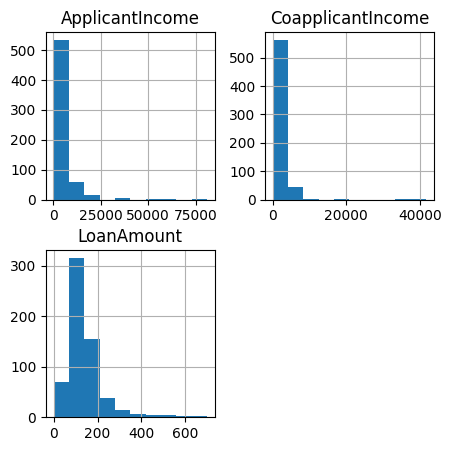

In [ ]:
#Plotting histograms for quantitaive (numerical) variables
data[numerical_columns].hist(figsize=(5,5))
plt.show()

**Visual Representation of categorical data**

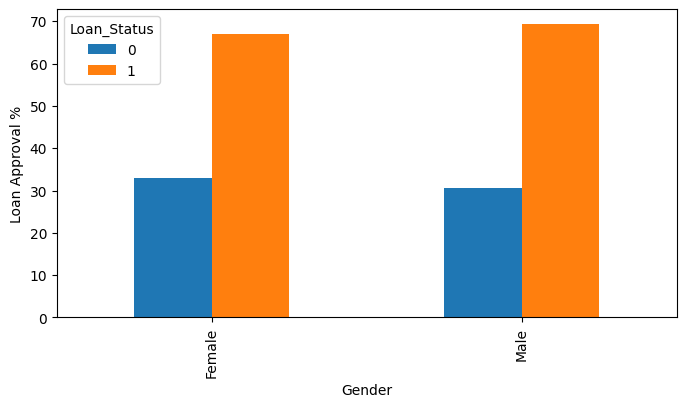

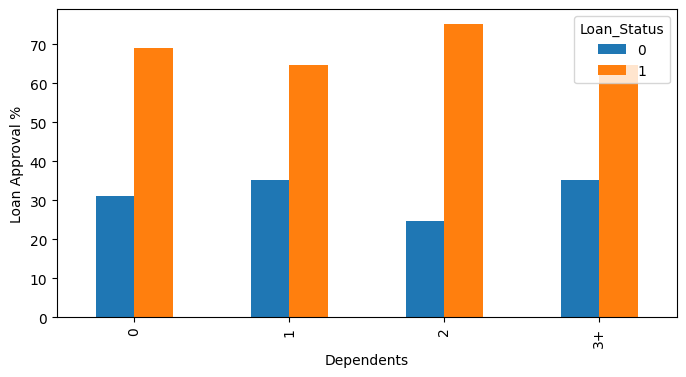

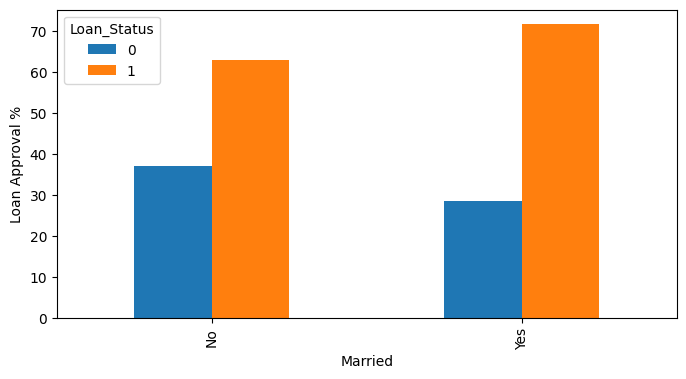

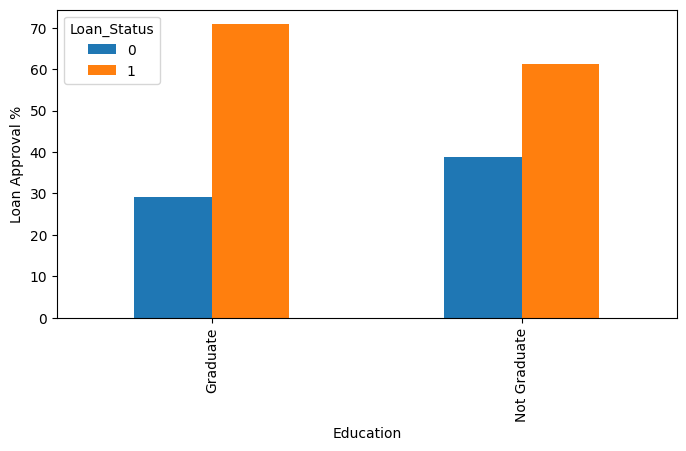

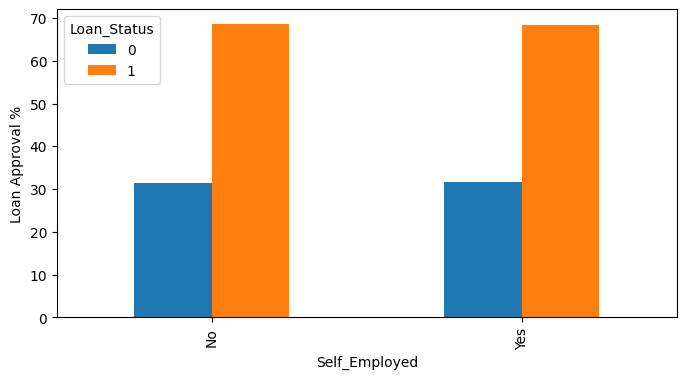

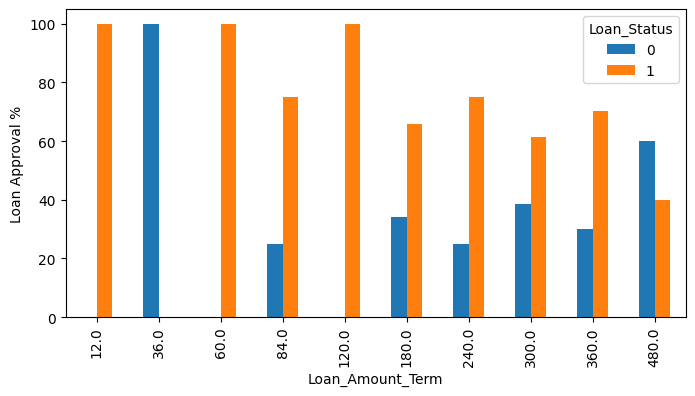

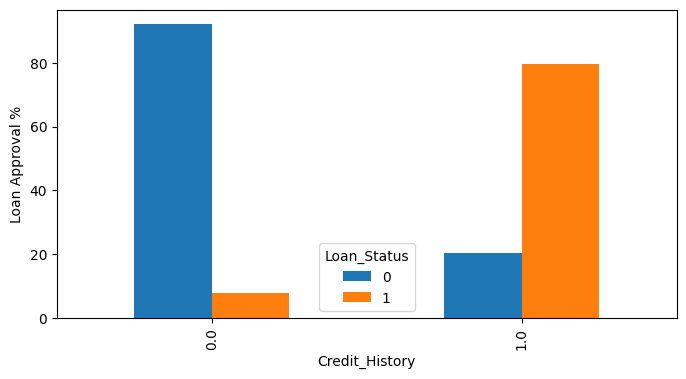

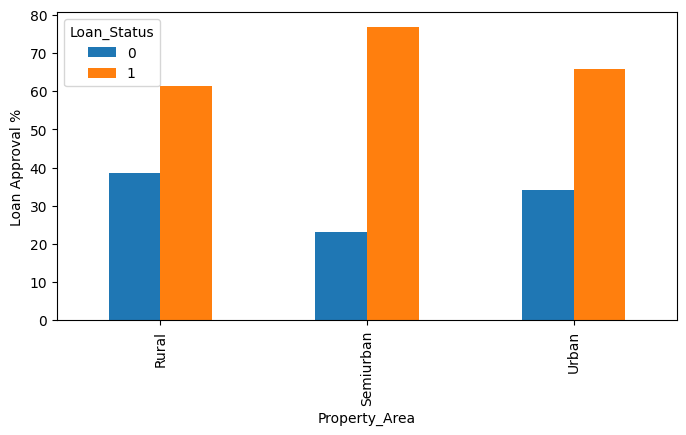

In [ ]:
#Plotting charts for all the categorical data columns
for i in categorical_columns:
    if i!='Loan_Status':
        (pd.crosstab(data[i],data['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=False)
        plt.ylabel('Loan Approval %')

> Applicants with a credit history meeting the required guidelines exhibit an
approximate 80% chance of loan approval, while those without any credit history have minimal chances of approval.

> For applicants with Loan_Amount_Term of 60 months and 120 months, there is a significantly high likelihood of loan approval.

> Loan approval rates are notably higher in semiurban areas, while rural and urban areas exhibit almost identical percentages of approval.

> Graduate applicants demonstrate a higher loan approval rate, approximately 70%, compared to non-graduates who have a slightly lower rate at around 60%.

> Married applicants have a higher percentage of loan approval compared to their non-married counterparts.

> The number of dependents does not appear to significantly impact the likelihood of loan approval.

> Gender does not show a discernible effect on loan approval rates.






**Missing Data Handling**

All of the missing data values are less that 20% of the total data. So, deleting all the records with blank values

In [ ]:
#Missing Data Handling - Since there are only few data rows with missing values., removing those records
columns_with_blank_records = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
data.dropna(subset=columns_with_blank_records, how='any', inplace=True)
#Pulling data info again to confirm if there are any null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             499 non-null    object 
 1   Married            499 non-null    object 
 2   Dependents         499 non-null    object 
 3   Education          499 non-null    object 
 4   Self_Employed      499 non-null    object 
 5   ApplicantIncome    499 non-null    int64  
 6   CoapplicantIncome  499 non-null    float64
 7   LoanAmount         499 non-null    int64  
 8   Loan_Amount_Term   499 non-null    float64
 9   Credit_History     499 non-null    float64
 10  Property_Area      499 non-null    object 
 11  Loan_Status        499 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 50.7+ KB


**Correlation Matrix for Predictor Variables**

In [ ]:
# Check the correlations
# Your code
#plt.figure(figsize=(16,10))cmap=sns.diverging_palette(230,20,as_cmap=True)
#sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap=cmap)
#plt.show()

<Axes: >

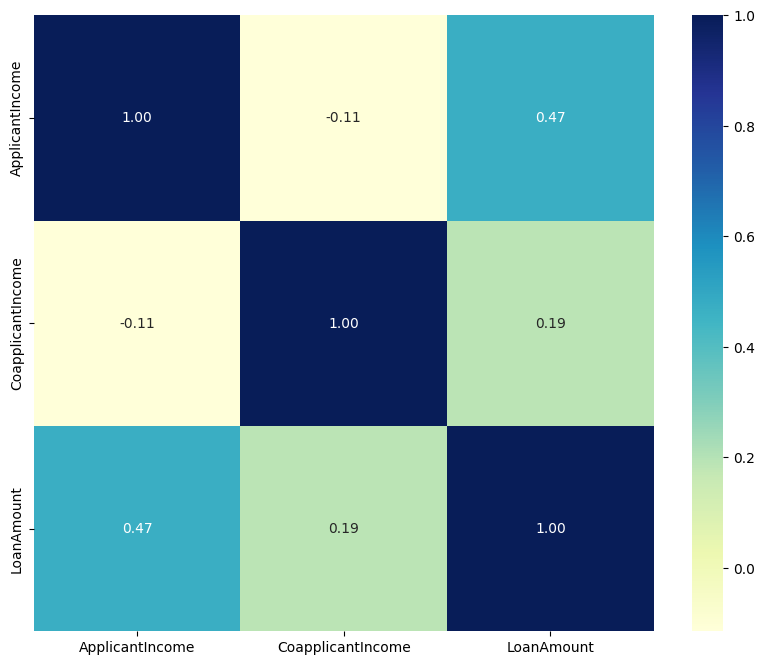

In [ ]:
#Creating correlation matrix for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(data[numerical_columns].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Convert the categorical data into Dummies**

In [ ]:
#Creating Dummies for categorical data columns
to_get_dummies_for = ['Gender', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area']
data = pd.get_dummies(data, columns=to_get_dummies_for, drop_first=False)
#Since the data in married column is a Yes/No - we just need to convert them into 1 and 0 as it doesn't make sense to create Yes and No columns separately and fill 1,0 again.
dict_married = {'Yes': 1, 'No': 0}
data['Married'] = data['Married'].map(dict_married)


**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
#Creating Independent and Dependent variables
Y= data.Loan_Status
X= data.drop(columns = ['Loan_Status'])

**Scaling the data**

In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

**Splitting the data into 70% train and 30% test set**

---



In [ ]:
#Splitting data for test and train.
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1,stratify=Y)

**Metrics_score() function**

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Loan_Status_N', 'Loan_Status_Y'], yticklabels=['Loan_Status_N', 'Loan_Status_Y'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Building Decision Tree Classifier Model**

In [ ]:
# Create Decision Tree classifer object
Loan_tree = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

# Train Decision Tree Classifer
Loan_tree = Loan_tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = Loan_tree.predict(x_test)
y_pred[:6]

array([1, 0, 0, 0, 0, 1])

**Evaluating the Model by Checking the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       238

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



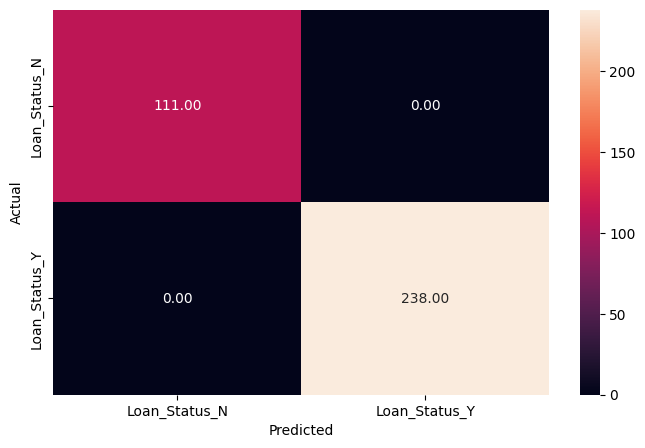

In [ ]:
#checking model performace of training data
y_pred_train_Loan = Loan_tree.predict(x_train)
metrics_score(y_train, y_pred_train_Loan)

 The output indicates that the decision tree classifier is performing extremely well on the training data, achieving perfect precision, recall, and F1-score for both classes, with an overall accuracy of 100%. It's important to note that these results might indicate overfitting, especially if the model has not been evaluated on a separate test dataset.

**Evaluating the Model by Checking the performance on the testing data**

              precision    recall  f1-score   support

           0       0.51      0.60      0.55        47
           1       0.80      0.74      0.77       103

    accuracy                           0.69       150
   macro avg       0.65      0.67      0.66       150
weighted avg       0.71      0.69      0.70       150



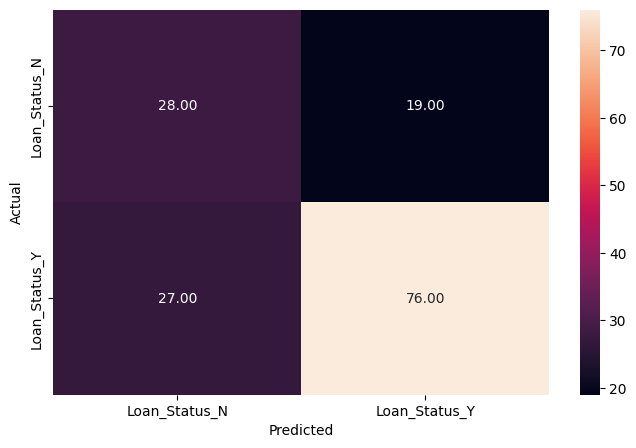

In [ ]:
y_pred_test_Loan = Loan_tree.predict(x_test)
metrics_score(y_test, y_pred_test_Loan)

We got a classification rate of 69%, which is considered as good accuracy.
> You can improve this accuracy by tuning the parameters in the decision tree algorithm.
---
Upon observing the confusion matrix for the training data, it becomes apparent that the model exhibits lower accuracy on the test dataset compared to the training dataset.
1.   This discrepancy suggests potential overfitting, where the model performs well on the training data but struggles to generalize to new, unseen data.
2.   To address this overfitting, we can employ hyperparameter tuning techniques.




**Hyperparamter Tuning for Decision Tree**

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Performance on Training Data:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64       111
           1       0.80      1.00      0.89       238

    accuracy                           0.83       349
   macro avg       0.90      0.73      0.76       349
weighted avg       0.86      0.83      0.81       349



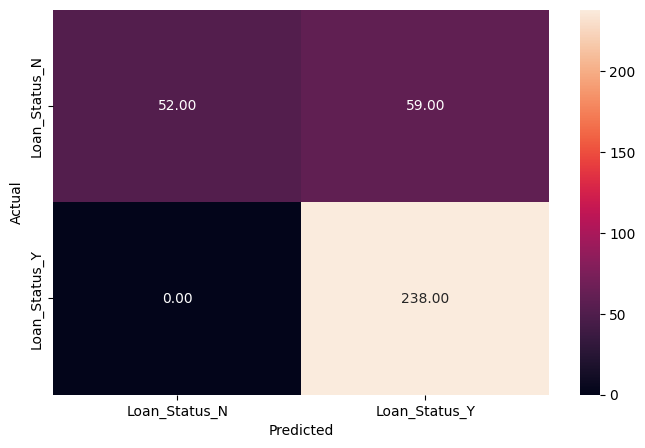

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.79      0.47      0.59        47
           1       0.80      0.94      0.86       103

    accuracy                           0.79       150
   macro avg       0.79      0.70      0.72       150
weighted avg       0.79      0.79      0.78       150



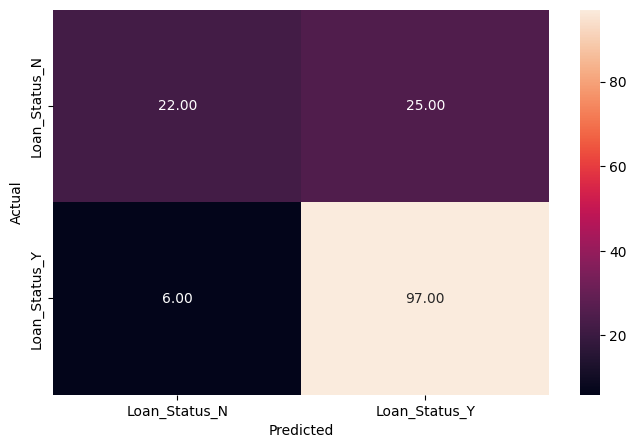

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create Decision Tree classifer object with hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Decision Tree Classifer with the best hyperparameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(x_train, y_train)

# Checking performance on the training data
print("Performance on Training Data:")
y_pred_train_best = best_dt_model.predict(x_train)
metrics_score(y_train, y_pred_train_best)

# Checking performance on the test dataset
print("Performance on Test Data:")
y_pred_test_best = best_dt_model.predict(x_test)
metrics_score(y_test, y_pred_test_best)

**Feature Importance of the Variables**





<Axes: xlabel='Importance', ylabel='None'>

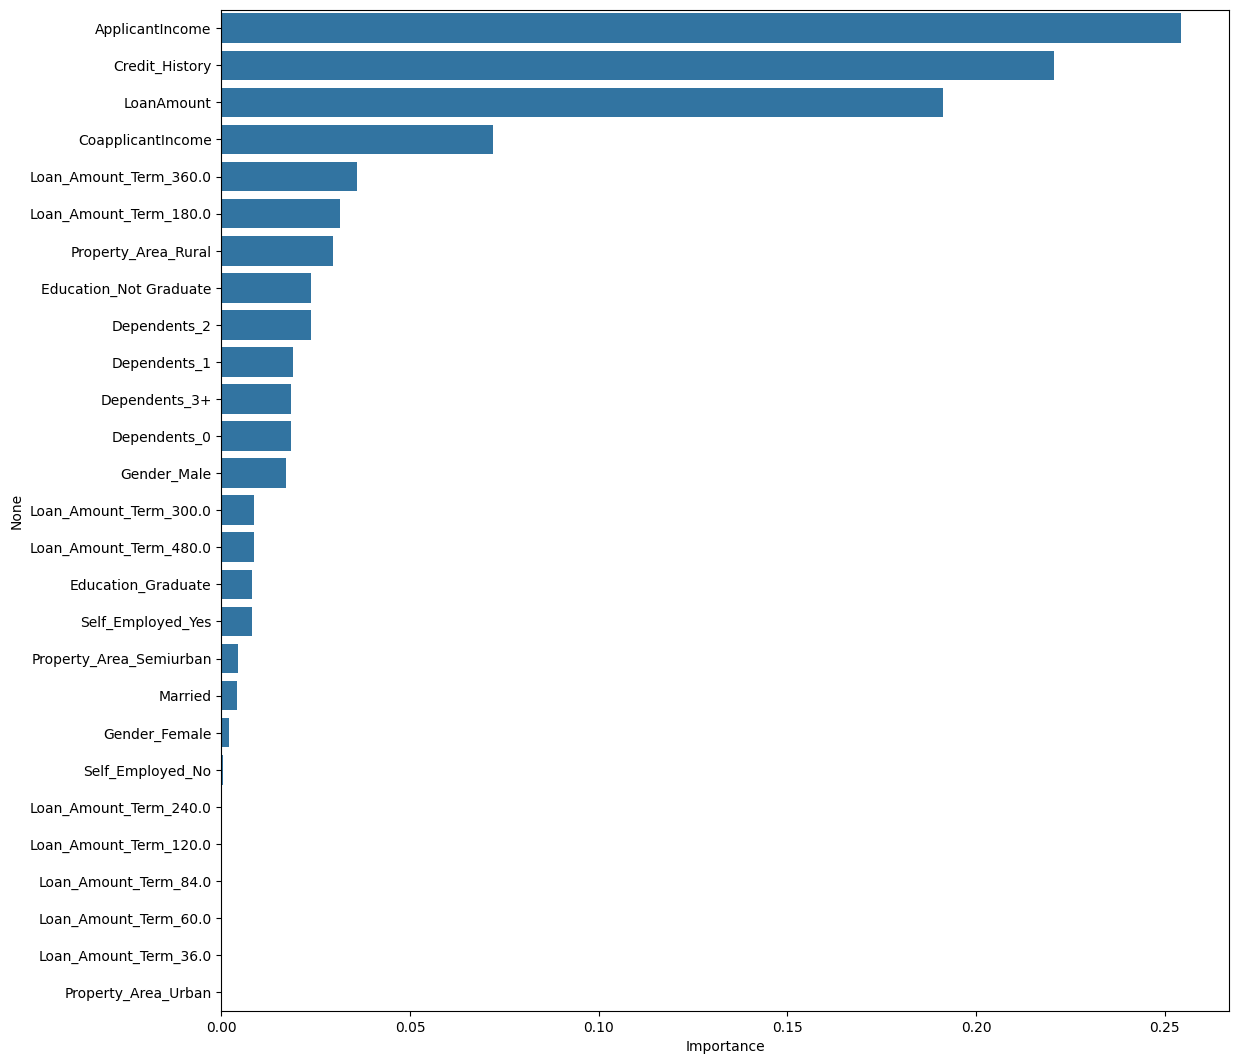

In [ ]:
#plotting the importance plot
importances = Loan_tree.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

 The model assigns the highest importance to **Applicant Income** and least to Marital Status.
 Some of the most important features are:

1.   LoanAmount
2.   Credit History
3.  Loan_Amount_Term




**Method 2: Logistic Regression**

Run the model and generate confusion matrix for Train and Test data

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.88      0.47      0.61       111
           1       0.80      0.97      0.88       238

    accuracy                           0.81       349
   macro avg       0.84      0.72      0.74       349
weighted avg       0.82      0.81      0.79       349



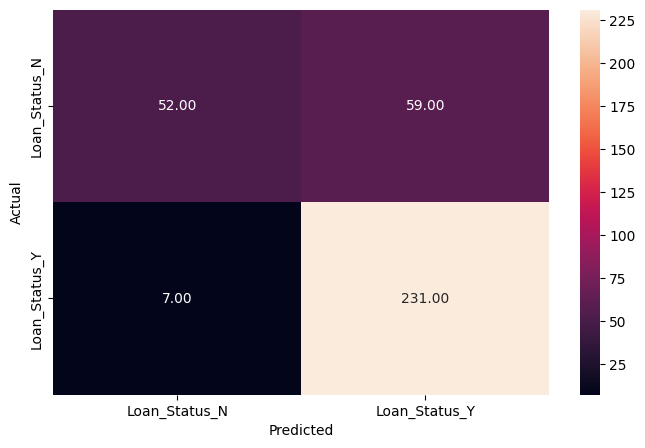

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63        47
           1       0.81      0.93      0.87       103

    accuracy                           0.81       150
   macro avg       0.80      0.73      0.75       150
weighted avg       0.80      0.81      0.79       150



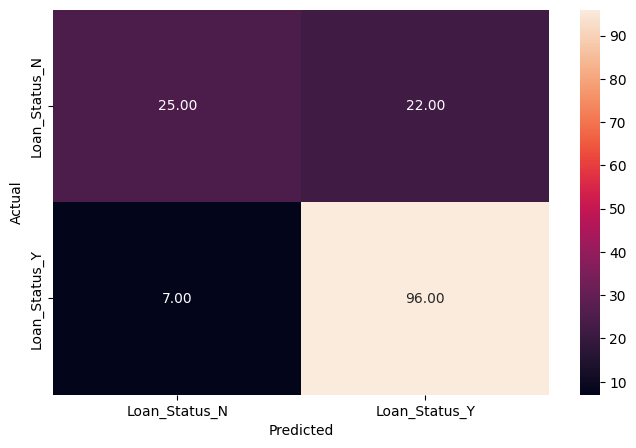

In [ ]:
#logistic regression model - Instantiate the model
lg=LogisticRegression()

# Train the model
lg.fit(x_train,y_train)

# Checking the performance on the training data
print("Performance on Training Data:")
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

# Checking the performance on the test dataset
print("Performance on Test Data:")
y_pred_test = lg.predict(x_test)
metrics_score(y_test,y_pred_test)

**Feature Importance**

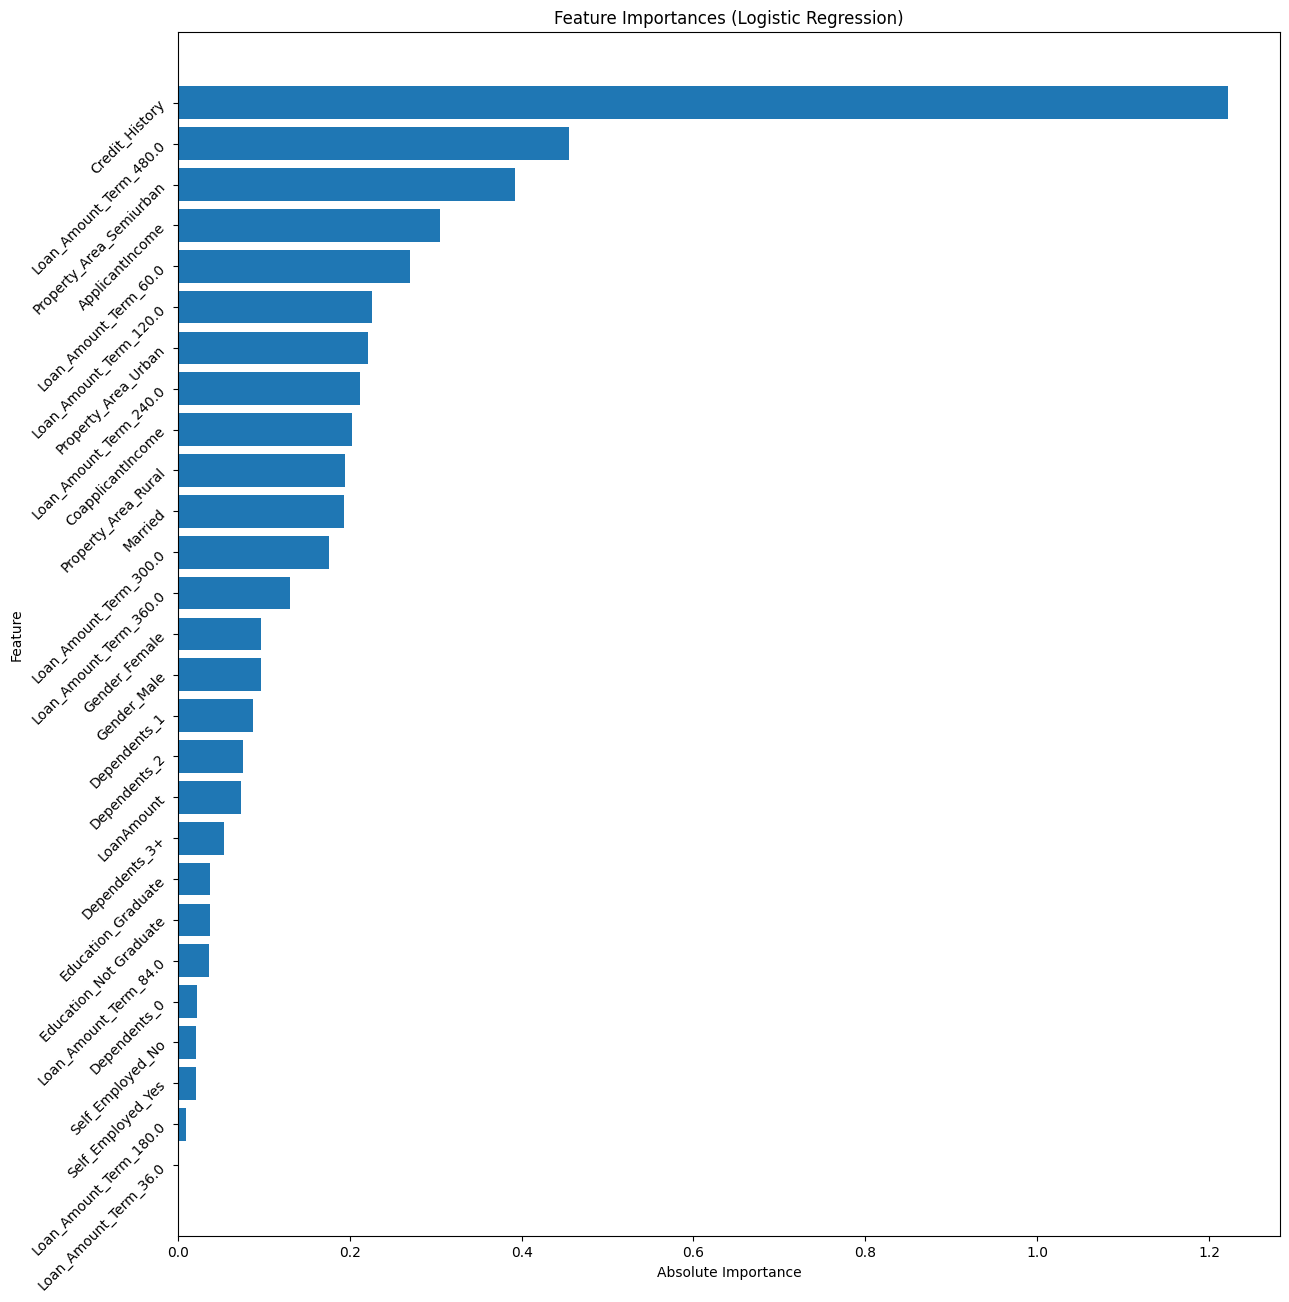

In [ ]:
# Get absolute feature coefficients
coefficients = np.abs(lg.coef_[0])
feature_names = X.columns

# Sort feature coefficients and corresponding feature names
indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[indices]
sorted_coefficients_names = np.array(feature_names)[indices]

# Convert sorted_feature_names to a list
sorted_coefficients_names = sorted_coefficients_names.tolist()

# Plotting
plt.figure(figsize=(13, 13))
plt.barh(range(X.shape[1]), sorted_coefficients, align="center")
plt.yticks(range(X.shape[1]), sorted_coefficients_names, rotation=45, ha="right")
plt.ylabel("Feature")
plt.xlabel("Absolute Importance")
plt.title("Feature Importances (Logistic Regression)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

**Logistic Regression Coefficients**

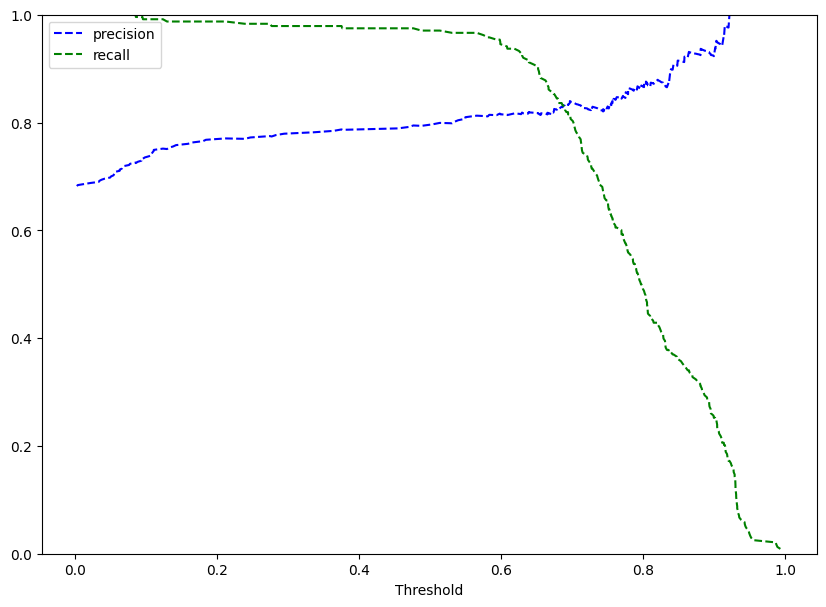

In [ ]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

y_scores_lg=lg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Support Vector Machines**

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.89      0.42      0.57       111
           1       0.78      0.97      0.87       238

    accuracy                           0.80       349
   macro avg       0.84      0.70      0.72       349
weighted avg       0.82      0.80      0.77       349



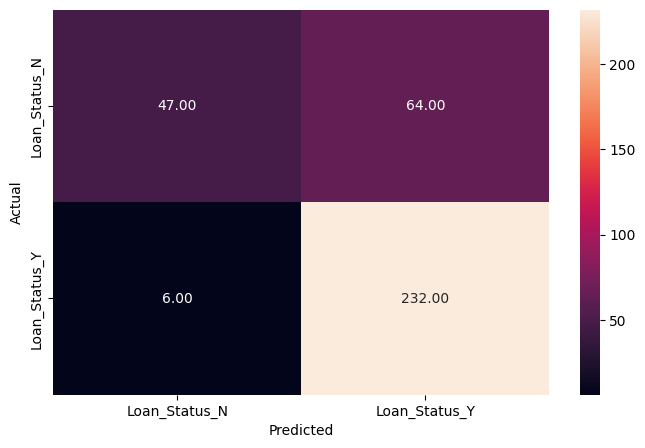

              precision    recall  f1-score   support

           0       0.83      0.53      0.65        47
           1       0.82      0.95      0.88       103

    accuracy                           0.82       150
   macro avg       0.82      0.74      0.76       150
weighted avg       0.82      0.82      0.81       150



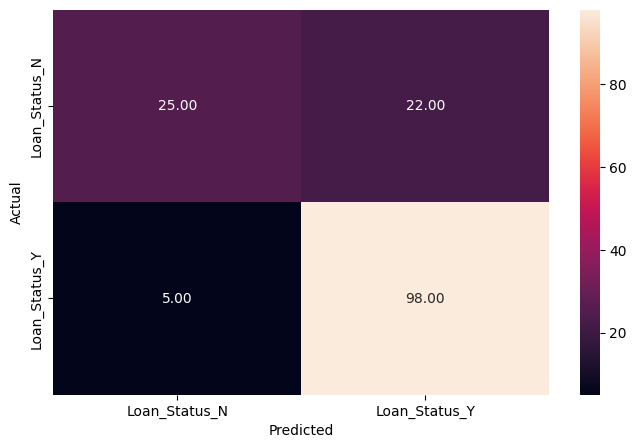

In [ ]:
from sklearn.svm import SVC

# Instantiate the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=1)

# Train the SVM model
svm_model.fit(x_train,y_train)

# Checking the performance on the training data
print("Performance on Training Data:")
y_pred_train_svm = svm_model.predict(x_train)
metrics_score(y_train, y_pred_train_svm)

#checking model performace of test data
y_pred_test_svm = svm_model.predict(x_test)
metrics_score(y_test, y_pred_test_svm)

**Random Forest Classifier**


              precision    recall  f1-score   support

           0       0.91      0.37      0.53       111
           1       0.77      0.98      0.86       238

    accuracy                           0.79       349
   macro avg       0.84      0.68      0.69       349
weighted avg       0.81      0.79      0.76       349



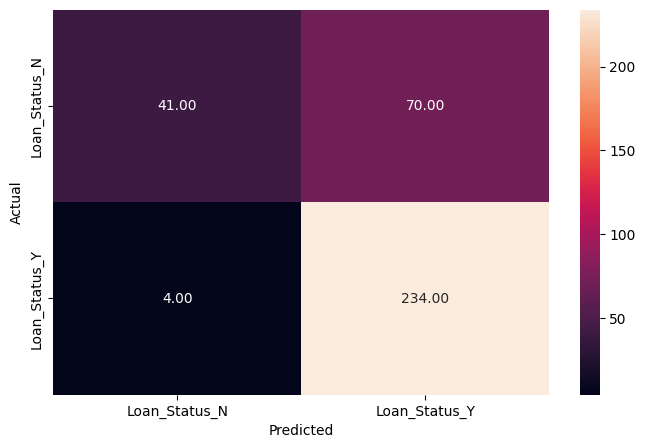

              precision    recall  f1-score   support

           0       0.91      0.45      0.60        47
           1       0.80      0.98      0.88       103

    accuracy                           0.81       150
   macro avg       0.85      0.71      0.74       150
weighted avg       0.83      0.81      0.79       150



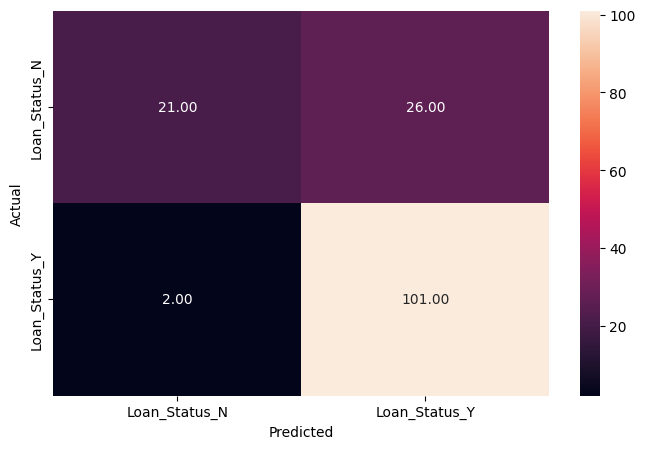

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

#checking model performace of training data
y_pred_train_dt = rf_clf.predict(x_train)
metrics_score(y_train, y_pred_train_dt)

#checking model performace of test data
y_pred_test_dt = rf_clf.predict(x_test)
metrics_score(y_test, y_pred_test_dt)

**Hypertuning on Random Forest Classifier**

Performance on Test Data (Tuned Random Forest Model):
              precision    recall  f1-score   support

           0       0.86      0.53      0.66        47
           1       0.82      0.96      0.88       103

    accuracy                           0.83       150
   macro avg       0.84      0.75      0.77       150
weighted avg       0.83      0.83      0.81       150



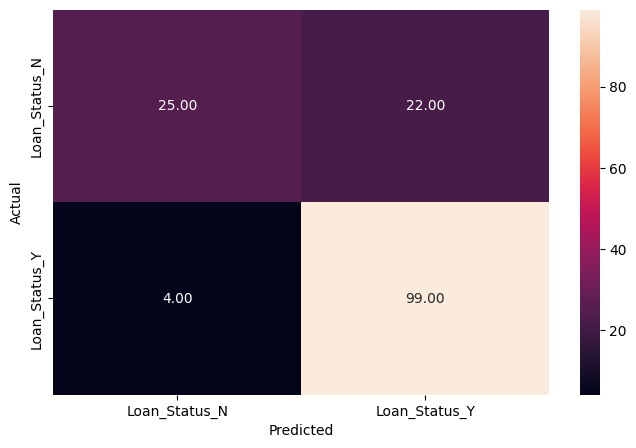

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Instantiate the Random Forest model
rf_clf = RandomForestClassifier(random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to train the final Random Forest model
best_rf_model = RandomForestClassifier(random_state=1, **best_params)
best_rf_model.fit(x_train, y_train)

# Checking the performance on the test dataset using the tuned model
print("Performance on Test Data (Tuned Random Forest Model):")
y_pred_test_rf_tuned = best_rf_model.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

**Feature Importance of the Variables**

Feature Importances:
                    Feature  Importance
4            Credit_History    0.282595
1           ApplicantIncome    0.165433
3                LoanAmount    0.123673
2         CoapplicantIncome    0.102405
23   Loan_Amount_Term_480.0    0.033867
25  Property_Area_Semiurban    0.031004
24      Property_Area_Rural    0.021978
0                   Married    0.021316
8              Dependents_1    0.021254
26      Property_Area_Urban    0.020687
7              Dependents_0    0.018897
5             Gender_Female    0.018453
22   Loan_Amount_Term_360.0    0.016719
9              Dependents_2    0.015416
19   Loan_Amount_Term_180.0    0.014949
11       Education_Graduate    0.014885
6               Gender_Male    0.013903
12   Education_Not Graduate    0.013600
13         Self_Employed_No    0.012152
10            Dependents_3+    0.010415
21   Loan_Amount_Term_300.0    0.009326
14        Self_Employed_Yes    0.009054
17    Loan_Amount_Term_84.0    0.004680
16    Loan_Amount_T

<Axes: xlabel='Importance', ylabel='None'>

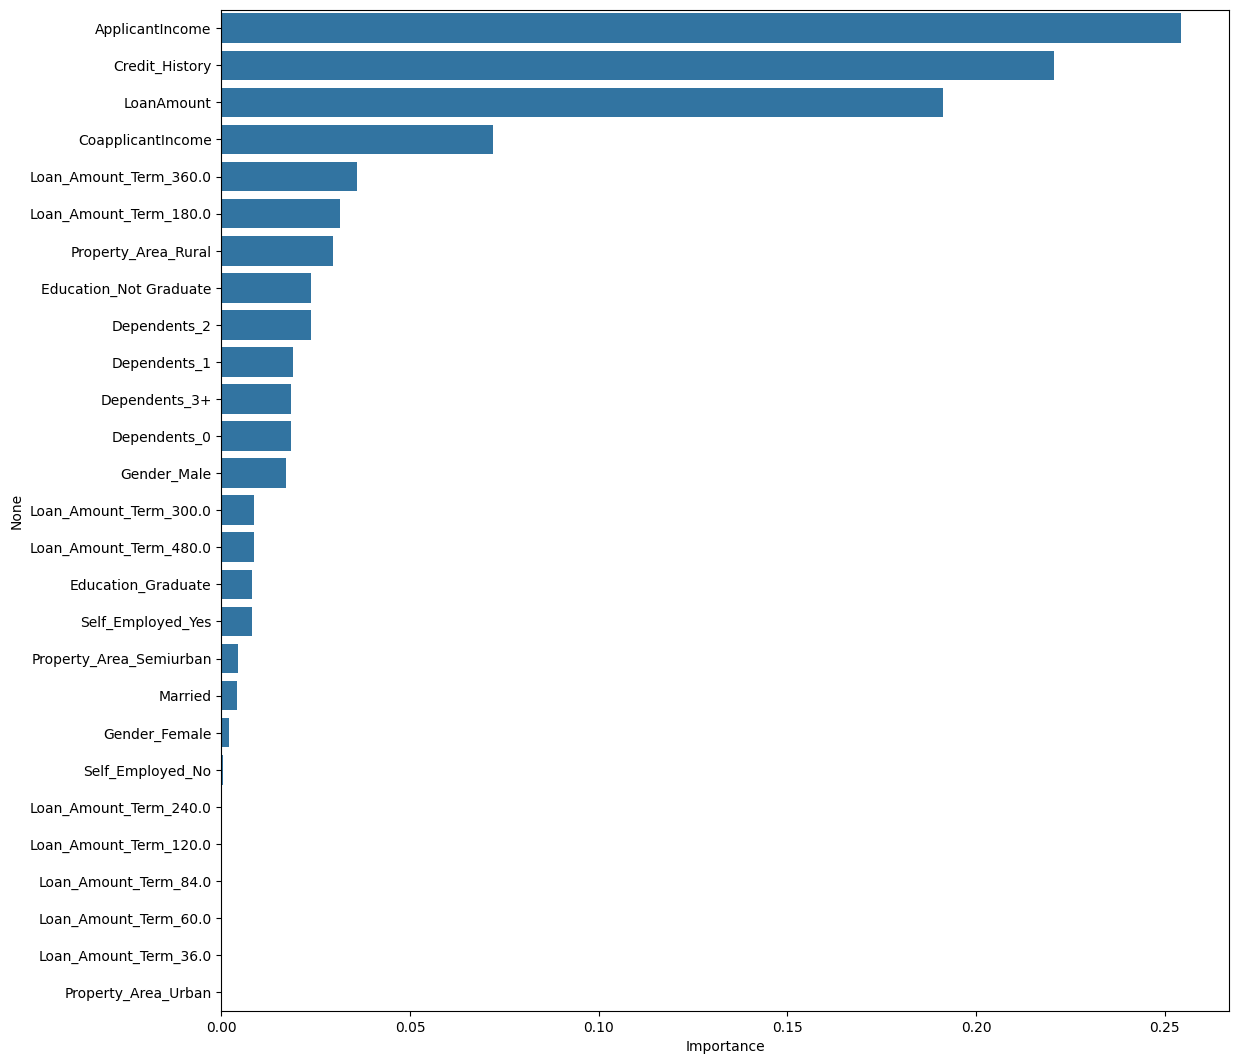

In [ ]:
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Feature Importances:")
print(importances_df)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)